In [19]:
import pandas as pd
import numpy as np
import tweepy # to use Twitter’s API
#import textblob as TextBlob # for doing sentimental analysis
from textblob import TextBlob
import re # regex for cleaning the tweets

In [3]:
# Twitter Api Credentials
consumer_key = '04AVoeKt2hRofIDdaM1mtijaT'
consumer_secret = 'sy7NX99zOMVShO1TdpaApeXsQ8rqlSZq64tFY3spCaPoy2f5sE'
access_token = '941842956-FvsmKxzzp6isal1JA0eQh6F1smn2teabCYogdjZu'
access_token_secret = 'tbGYW3hYzxV7jDLw9REtFLZ5cGs2qd3rtxPoExh6exa0T'

In [4]:
def twitter():
    # Creating the authentication object
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
    # Setting your access token and secret
    auth.set_access_token(access_token, access_token_secret) 
    # Creating the API object while passing in auth information
    api = tweepy.API(auth, wait_on_rate_limit = True)  
    return api

In [37]:
# Creating tw object
tw = twitter()
# Extracting Ellen DeGeneres tweets
search = tw.user_timeline(screen_name="vinnygarr", count = 1500, lang ="en")
#  Printing last 10 tweets
print("10 recent tweets:\n")
for tweets in search[:10]:
    print(tweets.text + '\n')

10 recent tweets:

There hasn't been any innovation in podcasting for 10 years. it is a very antiquated, primitive (lack of) technolog… https://t.co/QF7o2EnUc5

RT @iingwen: Today I asked the Executive Yuan to draw up a humanitarian assistance action plan for #HongKong citizens that lays out clear,…

It's truly a sad day for all of those whose name is Karen. #CentralParkKaren #CentralParKKKaren

Level-10 honesty https://t.co/M0QJbb0kRR

Underrated tweetstorm https://t.co/8gJTAkAWF5

@YouTube has achieved some draconian level bs

Can verify this. Comment deleted within 10 seconds. https://t.co/k851XvMIZ7 https://t.co/lwa7S4UynY

@BethanyAllenEbr It is a world in which China excels at and America is failing to compete in. The paradigm must be changed.

“Always make time for baseball.”

Pablo Casals to 7-year-old Yo-Yo Ma

Plato's epistemology for madness: "human infirmity and divine release of the soul"

Of the divine: "prophetic (Apol… https://t.co/zqduddb7gf



In [38]:
# Converting into dataframe (Column name Tweets)
df = pd.DataFrame([tweets.text for tweets in search], columns=['Tweets'])

,Tweets
0,There hasn't been any innovation in podcasting...
1,RT @iingwen: Today I asked the Executive Yuan ...
2,It's truly a sad day for all of those whose na...
3,Level-10 honesty https://t.co/M0QJbb0kRR
4,Underrated tweetstorm https://t.co/8gJTAkAWF5
5,@YouTube has achieved some draconian level bs
6,Can verify this. Comment deleted within 10 sec...
7,@BethanyAllenEbr It is a world in which China ...
8,“Always make time for baseball.”\n\nPablo Casa...
9,"Plato's epistemology for madness: ""human infir..."


In [48]:
df.shape

(200, 1)

In [50]:
# Cleaning the tweets
# Creating a function called clean. removing hyperlink, #, RT, @mentions
def clean(x):
 x = re.sub(r'^RT[\s]+', '', x)
 x = re.sub(r'https?:\/\/.*[\r\n]*', '', x)
 x = re.sub(r'#', '', x)
 x = re.sub(r'@[A-Za-z0–9]+', '', x) 
 return x
df['Tweets'] = df['Tweets'].apply(clean)

In [51]:
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity
df['polarity'] = df['Tweets'].apply(polarity)
df['subjectivity'] = df['Tweets'].apply(subjectivity)

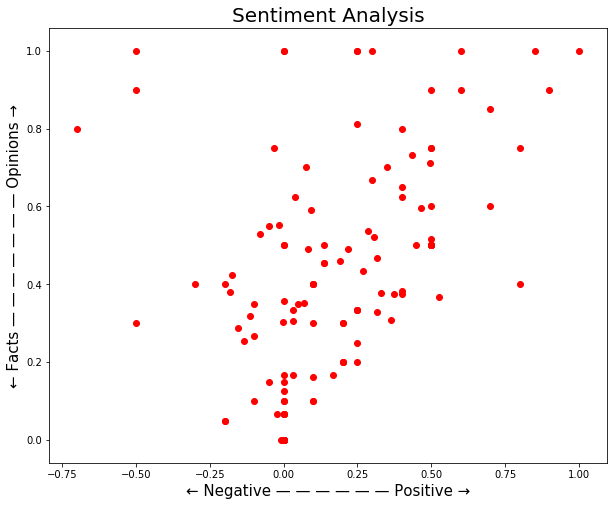

In [52]:
# Let’s plot the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]
for index, Tweets in enumerate(df.index):
 x = df.polarity.loc[Tweets]
 y = df.subjectivity.loc[Tweets]
 plt.scatter(x, y, color='Red')
 
 
plt.title('Sentiment Analysis', fontsize = 20)
plt.xlabel('← Negative — — — — — — Positive →', fontsize=15)
plt.ylabel('← Facts — — — — — — — Opinions →', fontsize=15)
plt.show()

In [56]:
# Creating function for calculating positive, negative and neutral
# More than 1 --> Positive, equal to 0 --> neutral and less than 0 --> Negative
def ratio(x):
    if x > 0:
        return 1
    elif x == 0:
        return 0
    else:
        return -1
df['analysis'] = df['polarity'].apply(ratio)

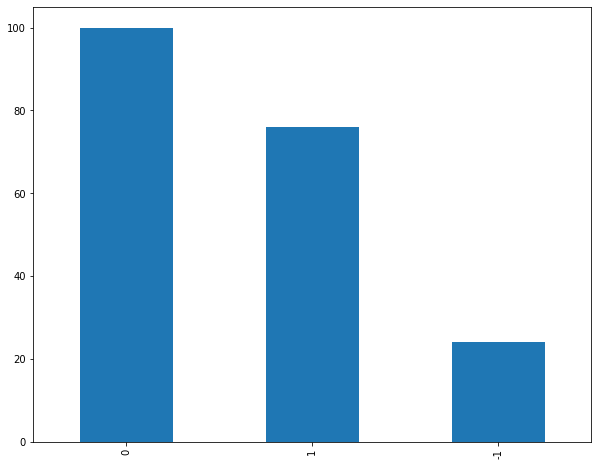

In [61]:
# Plotting
df['analysis'].value_counts().plot(kind = 'bar')
plt.show()